# Grating dispersion relation

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : February 22th 2017
- update :


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd

## Constants for conversions

In [8]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [9]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [10]:
deg_to_rad=np.pi/180.

In [11]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [12]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [13]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Grating

In [14]:
Ronchi_r=200 # number of lines per mm
Ronchi_a=mm_to_m/Ronchi_r  # line spacing in meter unit
Ronchi_size=2*inch_to_mm*mm_to_m # size of Ronchi Grating in meter
Ronchi_N=Ronchi_size/Ronchi_a   # total number of lines (not used)

In [15]:
Ronchi_size*m_to_mm

50.8

#### Filter

In [16]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

In [17]:
Filt_size

76.19999999999999

#### CCD Detector

In [18]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

## Hologram dispersion

In [19]:
wl =np.array([400.,600.,800.,1000.])

In [20]:
shift=np.array([4.306,6.484,8.6913,10.9336])

[ 0.01104505 -0.12781   ]


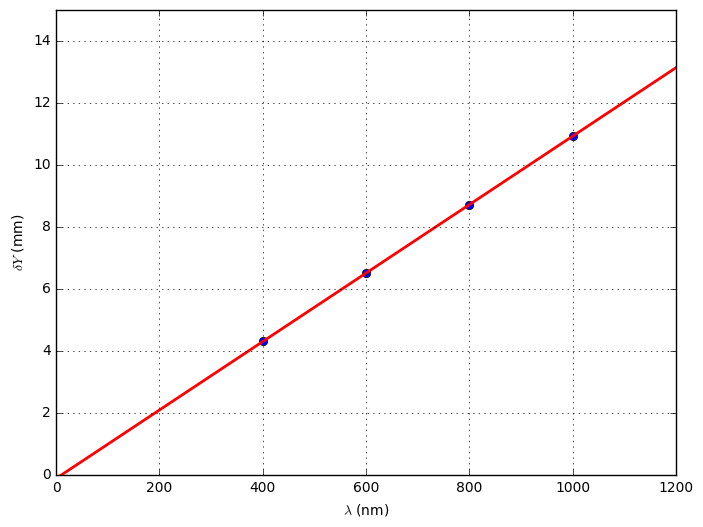

In [36]:
plt.figure(figsize=(8,6))
XMIN=0
XMAX=1200
YMIN=0
YMAX=15
plt.plot(wl,shift,"o")
plt.xlim(XMIN,XMAX)
plt.ylim(YMIN,YMAX)
plt.grid(True)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$\delta Y$ (mm)")

xfit=np.linspace(XMIN,XMAX,50)
z = np.polyfit(wl, shift, 1)
p = np.poly1d(z)
yfit=p(xfit)
plt.plot(xfit,yfit,'r-',lw=2)

print z
plt.savefig("dispersion.png")